In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
import seaborn as sns
df = pd.read_csv('fitness.csv').drop('Unnamed: 0', axis=1)
df.head()
X = df.drop('Oxygen', axis=1)
Y = df['Oxygen']


In [2]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X, Y)

DecisionTreeRegressor(max_depth=5)

Using the fitted model, answer the question: for which runner the oxygen consumption is
assessed as the highest?
 - For runner with runtime less then 8.9 and younger then 44 years and with rest pulse higher than 44 

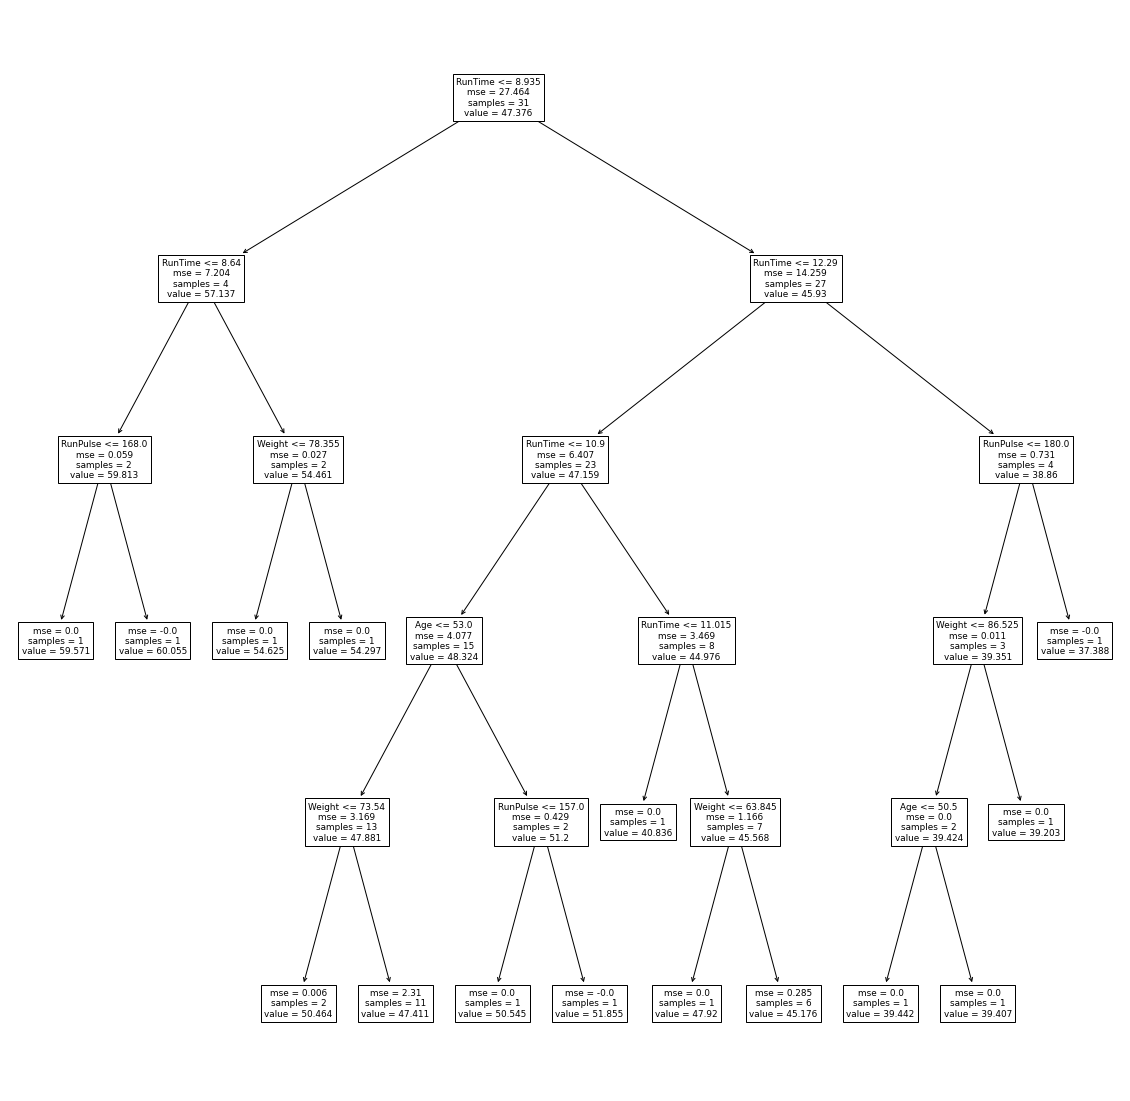

In [3]:
fig, ax = plt.subplots(figsize=(20,20))
_ = plot_tree(model, feature_names=X.columns)

Make a prediction for observation described by feature vector x0, for which coordinates are
equal to the means of the variables (so x0 is a typical runner).

In [4]:
model.predict(X.mean(axis=0).values.reshape(1, -1))

array([47.41127273])

d) Choose the optimal sub-tree, you can use e.g. cost-complexity criterion.

<ErrorbarContainer object of 3 artists>

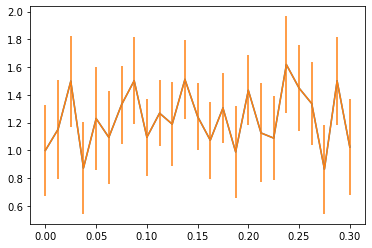

In [5]:
alphas = np.linspace(0, 0.3, 25)
parameters = {'ccp_alpha': alphas}
model = DecisionTreeRegressor()
gscv = GridSearchCV(model, parameters, cv=5)
gscv.fit(X, Y)
plt.plot(alphas, gscv.cv_results_['mean_test_score']/gscv.cv_results_['mean_test_score'][0])
plt.errorbar(alphas, gscv.cv_results_['mean_test_score']/gscv.cv_results_['mean_test_score'][0], yerr=gscv.cv_results_['std_test_score'])

In [6]:
gscv.best_params_

{'ccp_alpha': 0.2375}

In [7]:
X = df[['RunTime', 'Age']]

<ErrorbarContainer object of 3 artists>

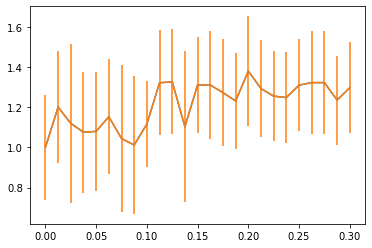

In [8]:
alphas = np.linspace(0, 0.3, 25)
parameters = {'ccp_alpha': alphas}
model = DecisionTreeRegressor()
gscv = GridSearchCV(model, parameters, cv=5)
gscv.fit(X, Y)
plt.plot(alphas, gscv.cv_results_['mean_test_score']/gscv.cv_results_['mean_test_score'][0])
plt.errorbar(alphas, gscv.cv_results_['mean_test_score']/gscv.cv_results_['mean_test_score'][0], yerr=gscv.cv_results_['std_test_score'])

In [9]:
gscv.best_params_

{'ccp_alpha': 0.19999999999999998}

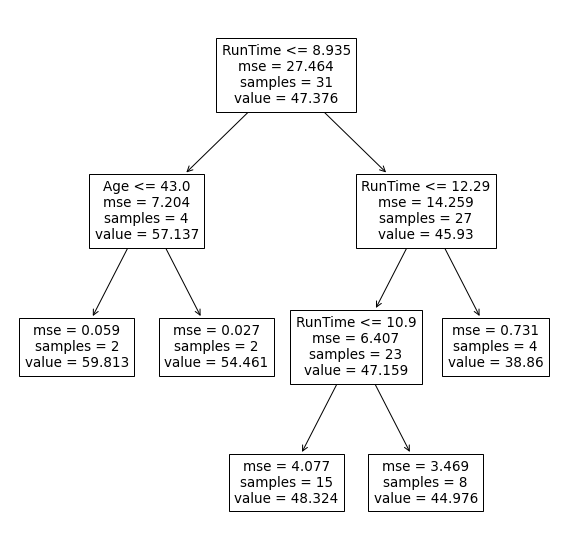

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
model = DecisionTreeRegressor(max_depth=3,**gscv.best_params_).fit(X, Y)
_ = plot_tree(model, feature_names=X.columns)

Fit a tree model using only two variables: RunTime and Age. Make a visualization of the
predicted values Oxygen. Example visualization is depicted below.

Text(69.0, 0.5, 'Run time')

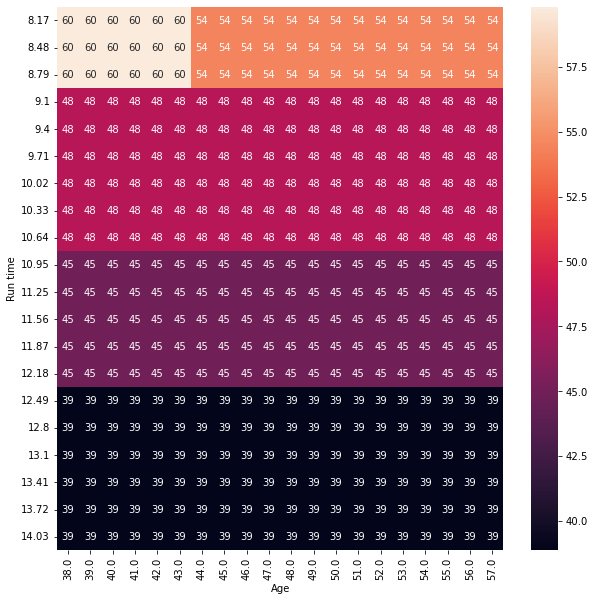

In [12]:
min_runtime, max_runtime = X['RunTime'].min(), X['RunTime'].max()
min_age, max_age = X['Age'].min(), X['Age'].max()
n = 20
runtime = np.linspace(min_runtime, max_runtime, n)
age = np.linspace(min_age, max_age, n)
data = np.zeros((len(runtime), len(age)))
for i in range(len(runtime)): 
    for j in range(len(age)): 
        data[i,j] = model.predict(np.array([runtime[i], age[j]]).reshape(1, -1)).flatten()[0]
data = pd.DataFrame(data, columns=age, index=[round(elem, 2) for elem in runtime])
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data, annot=True, fmt='.0f')
ax.set_xlabel('Age')
ax.set_ylabel('Run time')

In [13]:
print(export_text(model, feature_names=list(X.columns)))

|--- RunTime <= 8.93
|   |--- Age <= 43.00
|   |   |--- value: [59.81]
|   |--- Age >  43.00
|   |   |--- value: [54.46]
|--- RunTime >  8.93
|   |--- RunTime <= 12.29
|   |   |--- RunTime <= 10.90
|   |   |   |--- value: [48.32]
|   |   |--- RunTime >  10.90
|   |   |   |--- value: [44.98]
|   |--- RunTime >  12.29
|   |   |--- value: [38.86]

